<a href="https://colab.research.google.com/github/MahendraFirmansyah/PVCK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 70


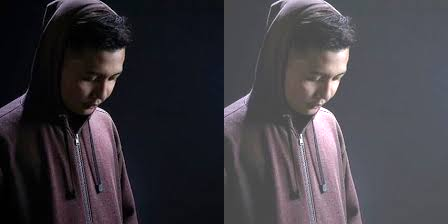

In [16]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/1.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

--------------------------------
Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan[-255 - 255]: 100
Masukkan kontras [1.0 - 3.0]: 3


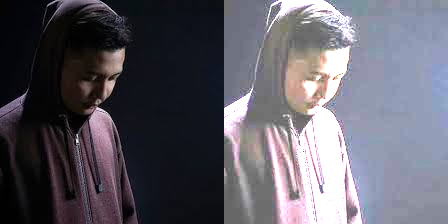

In [17]:
#Tugas 1

print('--------------------------------')
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try :
  brightness = int(input('Masukkan nilai kecerahan[-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/PCVK/1.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

--------------------------------
Mengubah tingkat kecerahan citra dengan Transform Log
--------------------------------
Masukkan nilai kecerahan: 40


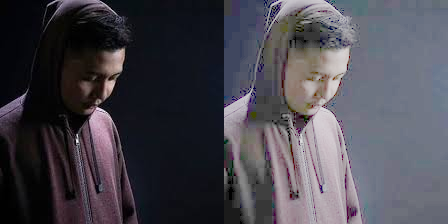

In [19]:
#Tugas 2 

print('--------------------------------')
print('Mengubah tingkat kecerahan citra dengan Transform Log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/1.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * np.log(original[y,x,c] + 1), 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

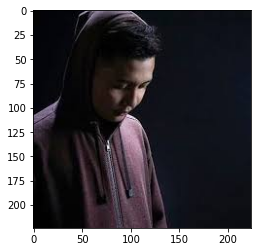

In [20]:
#Tugas 3A

import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv.imread('/content/drive/MyDrive/PCVK/1.jpg')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_color)

# # ekstraksi 3 channel warna
# # image[x,y,c]
# R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,-1]

# gray_img = ( R + G + B) * 0.3

# f, axarr = plt.subplots(1,2) #membuat 2 plot untuk 2 citra input dan output
# axarr[0].imshow(img_color)
# axarr[1].imshow(gray_img, cmap='gray')

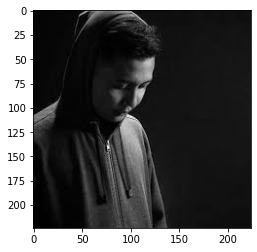

In [21]:
imgavg = cv.imread('/content/drive/MyDrive/PCVK/1.jpg')
imgavg[:] = imgavg.mean(axis=-1, keepdims=1)
plt.imshow(imgavg)

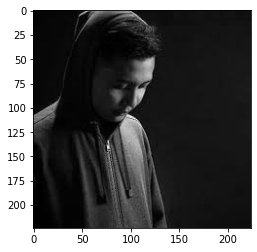

In [22]:
#Tugas 3B

imglight = cv.imread('/content/drive/MyDrive/PCVK/1.jpg')
imglight[:] = np.max(imglight,axis=-1, keepdims=1)/2+np.min(imglight,axis=-1,keepdims=1)/2
plt.imshow(imglight)

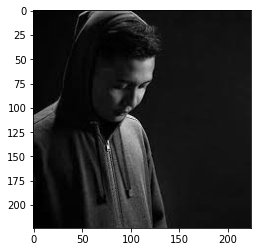

In [23]:
#Tugas 3C

imgelum = cv.imread('/content/drive/MyDrive/PCVK/1.jpg')
R, G, B = imgelum[:,:,0], imgelum[:,:,1], imgelum[:,:,2]

gray_imgelum = (0.21 * R) + (0.72 * G) + (0.07 * B)

plt.imshow(gray_imgelum, cmap='gray')

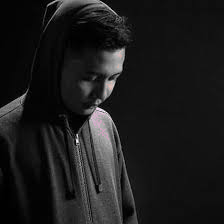

In [24]:
#Tugas 4

r = cv.imread('/content/drive/MyDrive/PCVK/1.jpg')
ret, mask = cv.threshold(r[:,:,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(r)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(r, mask3)
gray = cv.cvtColor(r, cv.COLOR_BGR2GRAY)
r = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(r, 255 - mask3)

out = gray + red
cv2_imshow(out)